# Week 7 Machine Learning
- Scott Williamson
- 6-13-24
- https://github.com/scottryanw/datafun-07-ml

##  Introduction
Work with Machine Learning principles to build models, make predictions, and visualize data using pandas, seaborn, matplotlib, and scikit-learn. Models will use simple linear regression to predict future values. 

Completed as part of Data Analytics Fundaments course towards completion of Data Analytics Masters at NW Missouri State University.

### Import Dependencies

In [114]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

## Part 1 - Chart a Straight Line

- Creating lambda to show relationship btween Celsius and Fahrenheit 

In [115]:
%matplotlib inline
c = lambda f: 5 / 9 * (f - 32)

In [116]:
temps = [(f, c(f)) for f in range(0, 101, 10)]

In [117]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

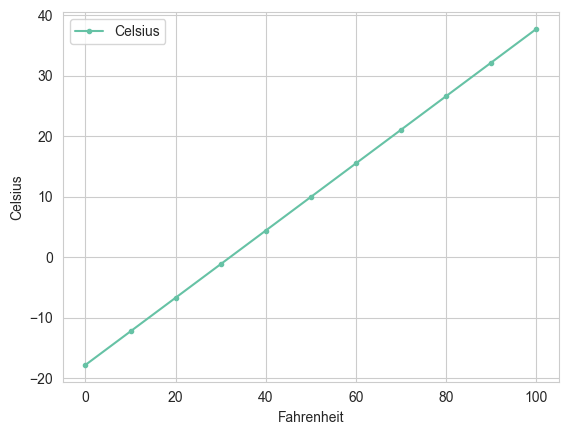

In [118]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction 1

### Section 1 - Data Acquisition
- Loading the Average High Temperatures into a `DataFrame` 

In [119]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [120]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [121]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [122]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [123]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [124]:
nyc.Date = nyc.Date.floordiv(100)

In [125]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics

In [126]:
pd.set_option('display.precision', 2)

In [127]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [128]:
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [129]:
linear_regression.slope

0.014771361132966163

In [130]:
linear_regression.intercept

8.694993233674289

### Section 6 - Predict

In [131]:
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

### Section 7 - Visualizations

In [132]:
sns.set_style('whitegrid')
sns.set_palette('Set2')

(10.0, 70.0)

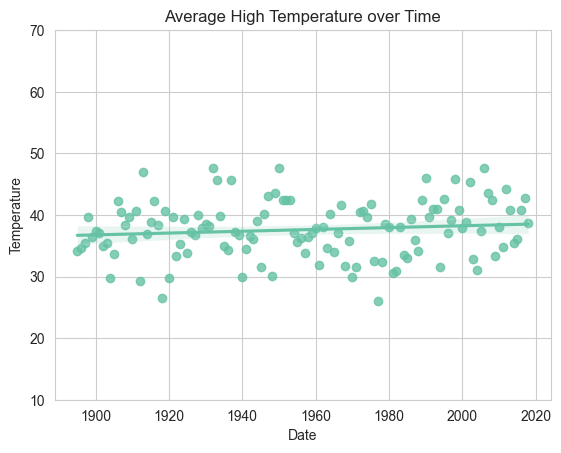

In [133]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
plt.title(f'Average High Temperature over Time')

axes.set_ylim(10, 70)

### Time Series Prediction

In [134]:
year = 2024

In [135]:
slope = linear_regression.slope

In [136]:
intercept = linear_regression.intercept

In [137]:
temperature = slope * year + intercept

In [138]:
while temperature < 40.0:
    year += 1
    temperature = slope * year + intercept

In [139]:
year

2120

- Based on the linear regression calculated slope and intercept, the average January temperature in New York City will reach 40 degrees Fahrenheit in 2120. 

## Part 3 - Prediction 2

### Section 1 - Build the Model
- Splitting the Data for Training and Testing

In [140]:
X_train, X_test, y_train, y_test = train_test_split(
     nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, 
     random_state=11)

In [141]:
X_train.shape

(93, 1)

In [142]:
X_test.shape

(31, 1)

- Training the Model

In [143]:
linear_regression = LinearRegression()

In [144]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [145]:
linear_regression.coef_

array([0.01939167])

In [146]:
linear_regression.intercept_

-0.30779820252658396

### Section 2 - Test the Model

In [147]:
predicted = linear_regression.predict(X_test)

In [148]:
expected = y_test

In [149]:
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict 

In [150]:
predict = (lambda x: linear_regression.coef_ * x + 
                      linear_regression.intercept_)

In [151]:
predict(2024)

array([38.94094855])

### Section 4 - Visualizations

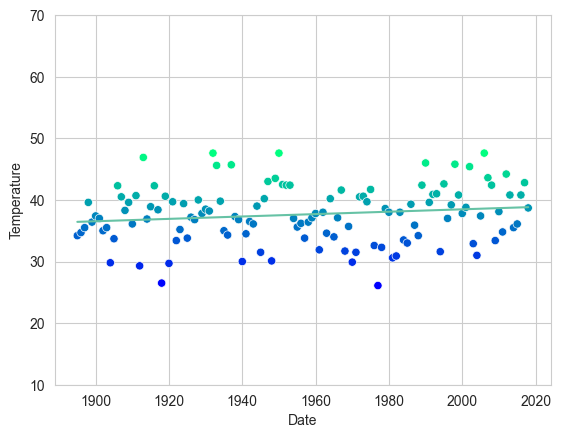

In [152]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

line = plt.plot(x, y)

## Part 4 - Insights

## Part 5 - Bonus